In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build Deep Neural Network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model and capture history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7839 - loss: 0.6020 - val_accuracy: 0.8413 - val_loss: 0.4273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8653 - loss: 0.3646 - val_accuracy: 0.8664 - val_loss: 0.3577
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.3249 - val_accuracy: 0.8716 - val_loss: 0.3530
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8881 - loss: 0.3009 - val_accuracy: 0.8657 - val_loss: 0.3769
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8946 - loss: 0.2798 - val_accuracy: 0.8763 - val_loss: 0.3394
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9002 - loss: 0.2675 - val_accuracy: 0.8818 - val_loss: 0.3294
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9045 - loss: 0.2526 - val_accuracy: 0.8807 - val_loss: 0.3288
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9062 - loss: 0.2446 - val_accura

### Visualize Sample Images

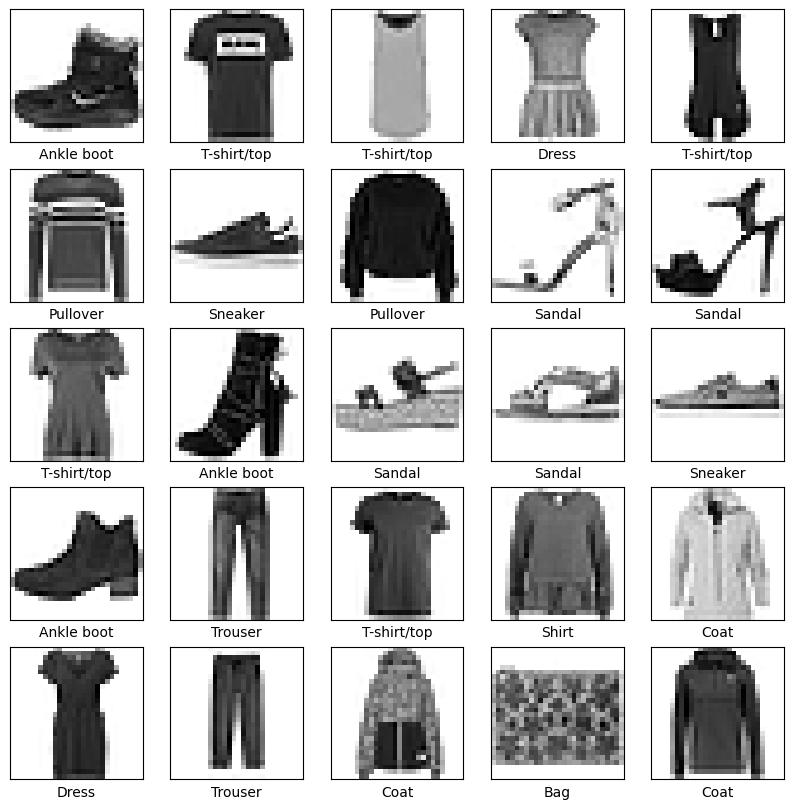

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The labels are one-hot encoded, so we need to convert them back to integers
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

### Predict on a Random Input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


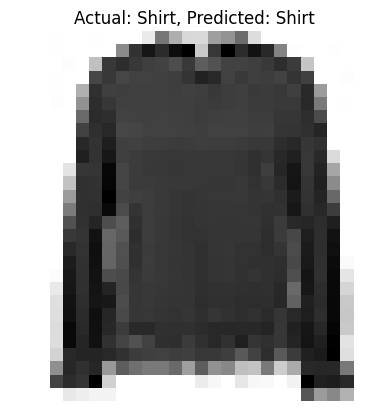

Actual Class: Shirt
Predicted Class: Shirt
Prediction Probabilities: [0.   0.   0.4  0.   0.09 0.   0.51 0.   0.   0.  ]


In [4]:
import random

# Get a random index from the test set
random_index = random.randint(0, len(x_test) - 1)
random_image = x_test[random_index]
random_label = np.argmax(y_test[random_index])

# Reshape the image for prediction (add batch dimension)
input_image = np.expand_dims(random_image, axis=0)

# Make a prediction
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])

plt.imshow(random_image, cmap=plt.cm.binary)
plt.title(f"Actual: {class_names[random_label]}, Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

print(f"Actual Class: {class_names[random_label]}")
print(f"Predicted Class: {class_names[predicted_class]}")
print(f"Prediction Probabilities: {predictions[0].round(2)}")

### Plot Training and Validation Accuracy/Loss

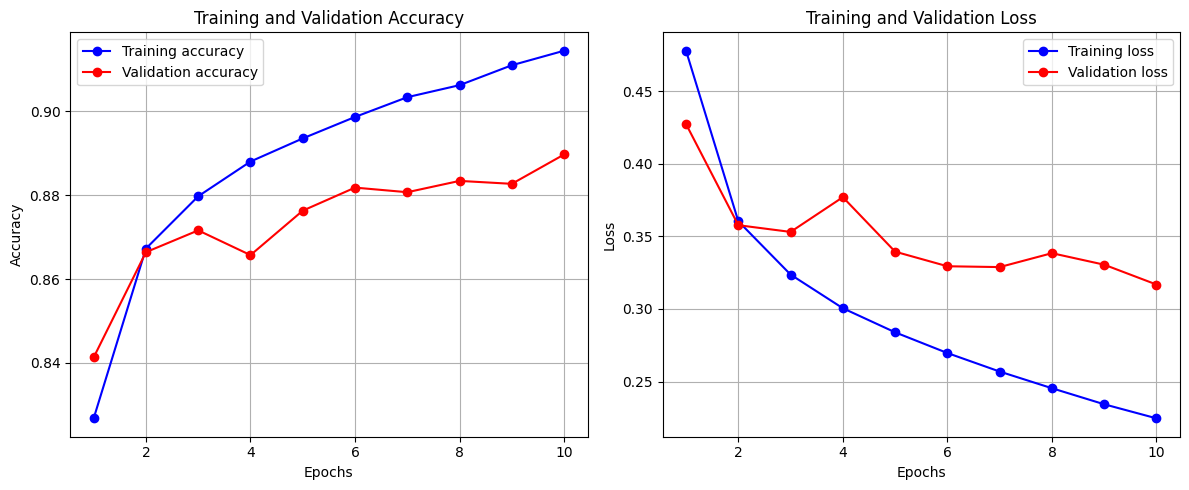

In [5]:
import matplotlib.pyplot as plt

# Get training and validation metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()